In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

mnist = input_data.read_data_sets('E:\MNIST_data', one_hot=True) #MNIST数据集所在路径
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784],name='x_input')

    y_ = tf.placeholder(tf.float32, [None, 10],name='y_input')

"""
要用tensorboard的话要加name_scope命名空间
可以完整的将神经网络的图画出来
"""
def weight_variable(shape):
    #shape 代表的是该层中连接的单元的个数
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)#constant有三个参数第一个必填代表传入的数据,第二个选填3代表数据的类型,第三个代表形状,可以有更高的纬度,还可以用zeros函数进行初始化
    return tf.Variable(initial)
#进行卷积,对四维的输入进行
def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')
#池化
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

with tf.name_scope('layer1'):
    with tf.name_scope('weight_conv1'):
        W_conv1 = weight_variable([5, 5, 1, 32])#表示5*5的网格,一个输入,32个输出,所以有32个偏差值
    with tf.name_scope('biases_conv1'):
        b_conv1 = bias_variable([32])
    with tf.name_scope('x_image'):
        x_image = tf.reshape(x,[-1,28,28,1],name='x_image')#利用reshape函数将图片转为一个tensor,图像是28*28,1代表灰度图,3代表rgb
    with tf.name_scope('h_conv1'):
        h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)#第一次卷积
    with tf.name_scope('h_pool1'):   
        h_pool1 = max_pool_2x2(h_conv1)#以2*2网格进行池化

#第二次的卷积池化
with tf.name_scope('layer2'):
    with tf.name_scope('weight_conv2'):
        W_conv2 = weight_variable([5, 5, 32, 64])
    with tf.name_scope('biases_conv2'):
        b_conv2 = bias_variable([64])
    with tf.name_scope('h_conv2'):
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    with tf.name_scope('h_pool2'):
        h_pool2 = max_pool_2x2(h_conv2)

#密集连接层
#此时，图片是7x7的大小。我们在这里加入一个有1024个神经元的全连接层。
# 之后把刚才池化后输出的张量reshape成一个一维向量，再将其与权重相乘，加上偏置项，再通过一个ReLU激活函数。
with tf.name_scope('layer3'):
    with tf.name_scope('weight_fc1'):
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
    with tf.name_scope('biases_fc1'):
        b_fc1 = bias_variable([1024])
    with tf.name_scope('h_pool2_flat'):
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    with tf.name_scope('h_fc1'):
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
with tf.name_scope('Keep_prob'):
    #防止过拟合
    with tf.name_scope('keep_prob'):
        keep_prob = tf.placeholder("float")
    with tf.name_scope('h_fc1_drop'):  
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    with tf.name_scope('W_fc2'):  
        W_fc2 = weight_variable([1024, 10])
    with tf.name_scope('b_fc2'):  
        b_fc2 = bias_variable([10])
    with tf.name_scope('y_conv'): 
        y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#计算交叉熵的代价函数
with tf.name_scope('Cross_entropy'):
    with tf.name_scope('cross_entropy'): 
        cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
    with tf.name_scope('train_step'):            
        train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)#使用优化器,优化器有很多种
    with tf.name_scope('accuracy'):
        with tf.name_scope('correct_prediction'):  
            correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))#找出预测正确的标签,将FALSE,TRUE转换为01
        with tf.name_scope('accuracy'):    
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))#计算正确率

saver = tf.train.Saver() #定义saver

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for i in range(10000):
        batch = mnist.train.next_batch(50)
        if i % 50 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    saver.save(sess, 'E:\model_save\model.ckpt') #模型储存位置

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting E:\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting E:\MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
step 0, training accuracy 0.16


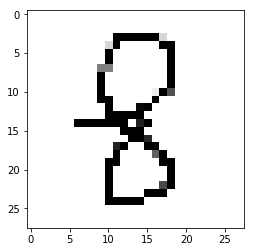

INFO:tensorflow:Restoring parameters from E:\model_save\model.ckpt
识别结果:
8


In [10]:
from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt
def imageprepare():
    im = Image.open(r'C:\Users\huanglei\Desktop\tensorflow-train-master\mnist\test_num\8.png') #读取的图片所在路径，注意是28*28像素
    plt.imshow(im)  #显示需要识别的图片
    plt.show()
    im = im.convert('L')
    tv = list(im.getdata())
    tva = [(255-x)*1.0/255.0 for x in tv]
    return tva

result=imageprepare()
# tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()

with tf.Session() as sess:
  
   
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "E:\model_save\model.ckpt") #使用模型，参数和之前的代码保持一致
    
    
    prediction=tf.argmax(y_conv,1)
    predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)
 
    print('识别结果:')
    print(predint[0])
    